 # Salary Prediction

### Importing required Libraries

In [1]:
import pandas as pd

In [2]:
import re

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

### Reading data from CSV file in to Pandas DataFrame

In [4]:
dataset = pd.read_csv('../../data/salaries.csv')

In [5]:
dataset.head() #displaying the records from pandas dataframe

,Company,Company Score,Job Title,Location,Date,Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.)
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.)
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.)
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.)
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.)


In [6]:
dataset.info()  #displaying information like column names,no of records,datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        868 non-null    object 
 1   Company Score  789 non-null    float64
 2   Job Title      870 non-null    object 
 3   Location       857 non-null    object 
 4   Date           870 non-null    object 
 5   Salary         764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.9+ KB


In [7]:
dataset.isna().sum()  ##checking for the number of missing values in each column

Company            2
Company Score     81
Job Title          0
Location          13
Date               0
Salary           106
dtype: int64

In [8]:
dataset[dataset['Salary'].isna()] ## displaying the rows with missing values in Salary column

,Company,Company Score,Job Title,Location,Date,Salary
764,January Technologies,4.5,Software Engineer III,"Fort Collins, CO",12d,NaN
765,Zebra Technologies,4.1,JavaScript Software Engineer – Analytics UI Team,"Indianapolis, IN",4d,NaN
766,Credit One Bank,3.8,"Software Engineer, Borrower Activation",United States,12d,NaN
767,Visa,3.8,"DevSecOps Software Engineer, II","Holtsville, NY",30d+,NaN
768,Foot Locker,4.6,Software Engineer I,"Las Vegas, NV",8d,NaN
...,...,...,...,...,...,...
865,RXO,NaN,"Software Engineer, Machine Learning Compute","San Francisco, CA",6d,NaN
866,Infosys,NaN,Software Engineer - 3 (Apache NiFi),"Annapolis Junction, MD",18d,NaN
867,Medtronic,NaN,Senior Software Engineer,"Southfield, MI",19d,NaN
868,NaN,NaN,Junior Python Developer,"Charlotte, NC",2d,NaN


In [9]:
i = dataset[dataset['Salary'].isna()].index ## getting the index of the missing values in salary column in to i

In [10]:
dataset = dataset.drop(i) ## dropping the records with missing values in salary column 

In [11]:
dataset.isna().sum() ## checking for missing values after cleaning up salary column

Company           0
Company Score     0
Job Title         0
Location         11
Date              0
Salary            0
dtype: int64

In [12]:
dataset[dataset['Location'].isna()]  ## getting records with missing value in Location column

,Company,Company Score,Job Title,Location,Date,Salary
19,Megaport,3.4,Frontend Software Engineer,NaN,2d,$84K - $133K (Glassdoor est.)
44,McKesson,3.9,Software Engineer,NaN,2d,$88K - $124K (Glassdoor est.)
97,Careerus Soultions,4.0,DevOps Engineer,NaN,2d,$90K - $125K (Glassdoor est.)
103,Diverse Career Solutions,3.7,Software Engineer,NaN,2d,$48K - $81K (Glassdoor est.)
174,"First Command Financial Services, Inc.",4.2,Software Engineer,NaN,2d,$50.00 - $70.00 Per Hour (Employer est.)
264,Flysoft,5.0,Software Engineer,NaN,2d,$78K - $112K (Glassdoor est.)
298,Numerica Corporation,4.7,Mobile Engineer,NaN,2d,$71K - $104K (Glassdoor est.)
304,Northwest Talent Solutions LLC,3.6,Software Engineer 2,NaN,2d,$93K - $131K (Glassdoor est.)
360,IXL Learning,3.8,"Sr Software Engineer, Snowflake focus",NaN,2d,$54K - $83K (Employer est.)
394,Proteus Co.,3.5,Engineer II - Software,NaN,2d,$56K - $89K (Glassdoor est.)


In [13]:
#i = dataset[dataset['Location'].isna()].index ## taking index of missing values in Location in to i

In [14]:
#dataset = dataset.drop(i) ## dropping records with missing location values

In [15]:
dataset['Location'] = dataset['Location'].apply(lambda x: "United States" if pd.isnull(x) else x)

In [16]:
##dataset = dataset.dropna()

In [17]:
dataset.isna().sum() ## checking if there are any missing values

Company          0
Company Score    0
Job Title        0
Location         0
Date             0
Salary           0
dtype: int64

In [18]:
dataset['Salary'].astype(str) ## converting salary column in to string datatype

0       $68K - $94K (Glassdoor est.)
1       $61K - $104K (Employer est.)
2      $95K - $118K (Glassdoor est.)
3       $97K - $145K (Employer est.)
4      $85K - $108K (Glassdoor est.)
                   ...              
759    $160K - $385K (Employer est.)
760            $222K (Employer est.)
761    $82K - $118K (Glassdoor est.)
762    $69K - $107K (Glassdoor est.)
763     $95K - $143K (Employer est.)
Name: Salary, Length: 764, dtype: object

In [19]:
## below is the UDF for finding min salary from the Salary column

def minsal(x):
    num = re.findall(r'\d+',x)        
    if 'hour' in x.lower() or 'hr' in x.lower():
        hourly_rate = float(num[0])
        annual_salary = hourly_rate * 40 * 52
        return int(annual_salary)
    if 'k' in x.lower():
        return int(float(num[0]) * 1000)
    return int(num[0])

In [20]:
## below is the UDF for finding max salary from the Salary column
def maxsal(x):
    num = list(map(float,re.findall(r"\d+\.\d+|\d+",x)))
    
    if 'hour' in x.lower() or 'hr' in x.lower():
        hourly_rate = max(num)
        annual_salary = hourly_rate * 40 * 52
        return int(annual_salary)
    elif 'k' in x.lower():
        return int(max(num) * 1000)
    else:
        return "correctit"

In [21]:
## below is the UDF for obtaining the company that estimated from the Salary column
def EstimatedBy(x):
    text = re.findall(r'\((.*?)\)',x)
    text1 = text[0].split(" ")
    return text1[0]

In [22]:
dataset['min'] = dataset['Salary'].apply(minsal) ## creating new column for storing min salary

In [23]:
dataset['max'] = dataset['Salary'].apply(maxsal)## creating new column for storing max salary

In [24]:
dataset['EstimatedBy'] = dataset['Salary'].apply(EstimatedBy) ## creating new column for storing estimated by

In [25]:
##dataset = dataset.drop('Salary',axis=1) ## dropping Salary column

In [26]:
dataset.head() ## displaying the dataframe

,Company,Company Score,Job Title,Location,Date,Salary,min,max,EstimatedBy
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.),68000,94000,Glassdoor
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.),61000,104000,Employer
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.),95000,118000,Glassdoor
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.),97000,145000,Employer
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.),85000,108000,Glassdoor


In [27]:
dataset['EstimatedBy'].value_counts() ##finding value counts of estimated by

EstimatedBy
Employer     436
Glassdoor    328
Name: count, dtype: int64

In [28]:
dataset['avgSalary']= (dataset['min']+dataset['max'])/2 ##creating the new column average salary from min and max

In [29]:
dataset.head(5)

,Company,Company Score,Job Title,Location,Date,Salary,min,max,EstimatedBy,avgSalary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.),68000,94000,Glassdoor,81000.0
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.),61000,104000,Employer,82500.0
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.),95000,118000,Glassdoor,106500.0
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.),97000,145000,Employer,121000.0
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.),85000,108000,Glassdoor,96500.0


In [30]:
dataset.isna().sum()  

Company          0
Company Score    0
Job Title        0
Location         0
Date             0
Salary           0
min              0
max              0
EstimatedBy      0
avgSalary        0
dtype: int64

/Users/saibrahmanaidukaturi/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


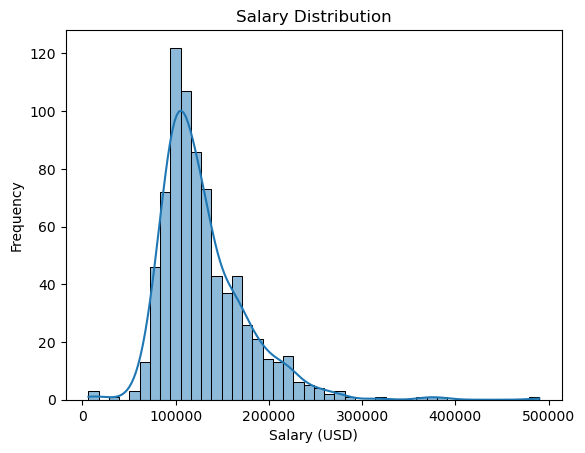

In [31]:
## checking the distribution of Salary
sns.histplot(dataset['avgSalary'], kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

In [32]:
dataset['avgSalary'].describe() ## finding the key statistics like mean,std,min,max of salary column

count       764.000000
mean     129274.206806
std       46711.054667
min        6500.000000
25%       99000.000000
50%      118000.000000
75%      150000.000000
max      490000.000000
Name: avgSalary, dtype: float64

In [33]:
skewness = dataset['avgSalary'].skew() ## checking for skewness
print(f'Skewness: {skewness}')

Skewness: 1.8720476395122003


In [34]:
#dataset['Job Title'].value_counts() ## finding the value counts of Job title

In [35]:
'''## below is the userdefined function for standardizing the job title
def standardize_title(text):
    # Convert text to title case
    text = text.title()
    
    # Regular expression to match Roman numerals
    roman_numerals = re.compile(r'\b(I|II|III|IV|V|VI|VII|VIII|IX|X)\b', re.IGNORECASE)
    
    # Convert matched Roman numerals back to uppercase
    text = roman_numerals.sub(lambda x: x.group().upper(), text)
    
    return text
'''

"## below is the userdefined function for standardizing the job title\ndef standardize_title(text):\n    # Convert text to title case\n    text = text.title()\n    \n    # Regular expression to match Roman numerals\n    roman_numerals = re.compile(r'\x08(I|II|III|IV|V|VI|VII|VIII|IX|X)\x08', re.IGNORECASE)\n    \n    # Convert matched Roman numerals back to uppercase\n    text = roman_numerals.sub(lambda x: x.group().upper(), text)\n    \n    return text\n"

In [36]:
#dataset['Job Title'] = dataset['Job Title'].apply(standardize_title) ## applying the standaridation of jobtitle

In [37]:
#dataset['Job Title'].value_counts() ## checking value counts after standardization

In [38]:
## below is the UDF for finding recency in days
def recency(x):
    if 'hr' in x.lower() or 'h' in x.lower():
        num = re.findall(r'\d+', x)
        return int(num[0]) / 24 
    elif 'd' in x.lower():
        num = re.findall(r'\d+', x)
        return int(num[0])  
    else:
        return None

In [39]:
dataset['recency'] = dataset['Date'].apply(recency) ## creating column recency in days

In [40]:
dataset.drop('Date',axis =1) ## dropping date as information is maintained using recency

,Company,Company Score,Job Title,Location,Salary,min,max,EstimatedBy,avgSalary,recency
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",$68K - $94K (Glassdoor est.),68000,94000,Glassdoor,81000.0,8.0
1,Workiva,4.3,Software Support Engineer,Remote,$61K - $104K (Employer est.),61000,104000,Employer,82500.0,2.0
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",$95K - $118K (Glassdoor est.),95000,118000,Glassdoor,106500.0,2.0
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",$97K - $145K (Employer est.),97000,145000,Employer,121000.0,2.0
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",$85K - $108K (Glassdoor est.),85000,108000,Glassdoor,96500.0,2.0
...,...,...,...,...,...,...,...,...,...,...
759,OpenAI,3.1,Apprentice ETL Software Engineer,"Elkridge, MD",$160K - $385K (Employer est.),160000,385000,Employer,272500.0,30.0
760,NCR Atleos,3.9,"Software Engineer, Tool & Infrastructure, Reli...","Palo Alto, CA",$222K (Employer est.),222000,222000,Employer,222000.0,1.0
761,Electronic Warfare Associates,3.8,"Software Engineer, Engineering Acceleration","San Francisco, CA",$82K - $118K (Glassdoor est.),82000,118000,Glassdoor,100000.0,5.0
762,"BillGO, Inc.",3.3,ATM Software Engineer (Level III),"Frisco, TX",$69K - $107K (Glassdoor est.),69000,107000,Glassdoor,88000.0,30.0


In [41]:
dataset.head() ## displaying records after cleaning

,Company,Company Score,Job Title,Location,Date,Salary,min,max,EstimatedBy,avgSalary,recency
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.),68000,94000,Glassdoor,81000.0,8.0
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.),61000,104000,Employer,82500.0,2.0
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.),95000,118000,Glassdoor,106500.0,2.0
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.),97000,145000,Employer,121000.0,2.0
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.),85000,108000,Glassdoor,96500.0,2.0


In [42]:
dataset[dataset["recency"].isnull()]

,Company,Company Score,Job Title,Location,Date,Salary,min,max,EstimatedBy,avgSalary,recency


In [43]:
dataset[dataset['avgSalary']>300000]

,Company,Company Score,Job Title,Location,Date,Salary,min,max,EstimatedBy,avgSalary,recency
157,Intuitive Machines LLC,3.8,Research Software Engineer,"Houston, TX",10d,$295K - $440K (Employer est.),295000,440000,Employer,367500.0,10.0
526,BOEING,4.0,Senior Software Engineer,"Washington, DC",30d+,$343K - $637K (Employer est.),343000,637000,Employer,490000.0,30.0
578,INTEL,5.0,"Software Engineer 2 - Mainframe (Cobol, JCL, V...","Brookfield, WI",12d,$310K - $465K (Employer est.),310000,465000,Employer,387500.0,12.0
668,Workday,4.0,Software Engineer - Camera (Technical Leadership),"Redmond, WA",3d,$300K - $450K (Employer est.),300000,450000,Employer,375000.0,3.0
743,Teradyne,3.6,Software Engineer (Onsite),"Columbia, MD",25d,$248K - $385K (Employer est.),248000,385000,Employer,316500.0,25.0


In [44]:
#dataset[~dataset['Job Title'].str.contains('Software Engineer')]

In [45]:
'''
def Jobrole(x):
    x = x.lower()
    if 'intern' in x:
        return "Software Intern"
    
    elif "engineer" in x and "data" not in x:
        if "entry" in x and "senior" in x:
            return "Mid-Level Engineer"
        elif "senior" in x or "iii" in x or "sr" in x or "sr." in x:
            return "Senior Engineer"
        elif "junior" in x or "entry" in x or "jr" in x or "jr." in x:
            return "Junior Engineer"
        else:
            return "Mid-Level Engineer"
        
    elif "scientist" in x or "analyst" in x and "data" in x:
        if "entry" in x and "senior" in x:
            return "Mid-Level Data Scientist/Analyst"
        elif "senior" in x or "iii" in x or "sr" in x or "sr." in x:
            return "Senior Data Scientist/Analyst"
        elif "junior" in x or "entry" in x  or "jr" in x or "jr." in x:
            return "Junior Data Scientist/Analyst"
        else:
            return "Mid-Level Data Scientist/Analyst"
        
    elif "devops" in x:
        if "entry" in x and "senior" in x:
            return "Mid-Level DevOps Engineer"
        elif "senior" in x or "iii" in x or "sr" in x or "sr." in x:
            return "Senior DevOps Engineer"
        elif "junior" in x or "entry" in x  or "jr" in x or 'jr.' in x:
            return "Junior DevOps Engineer"
        else:
            return "Mid-Level DevOps Engineer"
    
        
    elif "engineer" in x and "data" in x:
        if "entry" in x and "senior" in x:
            return "Mid-Level Data Engineer"
        elif "senior" in x or "iii" in x or "sr" in x or "sr." in x:
            return "Senior Data Engineer"
        elif "junior" in x or "entry" in x  or "jr" in x or "jr." in x:
            return "Junior Data Engineer"
        else:
            return "Mid-Level Data Engineer"
        
    elif "developer" in x or "programmer" in x or 'dev' in x:
        if "entry" in x and "senior" in x:
            return "Mid-Level Developer"
        elif "senior" in x or "iii" in x or  "sr" in x or "sr." in x:
            return "Senior Developer"
        elif "junior" in x or "entry" in x or "jr" in x or "jr." in x:
            return "Junior Developer"
        else:
            return "Mid-Level Developer"
    else:
        return x
'''

'\ndef Jobrole(x):\n    x = x.lower()\n    if \'intern\' in x:\n        return "Software Intern"\n    \n    elif "engineer" in x and "data" not in x:\n        if "entry" in x and "senior" in x:\n            return "Mid-Level Engineer"\n        elif "senior" in x or "iii" in x or "sr" in x or "sr." in x:\n            return "Senior Engineer"\n        elif "junior" in x or "entry" in x or "jr" in x or "jr." in x:\n            return "Junior Engineer"\n        else:\n            return "Mid-Level Engineer"\n        \n    elif "scientist" in x or "analyst" in x and "data" in x:\n        if "entry" in x and "senior" in x:\n            return "Mid-Level Data Scientist/Analyst"\n        elif "senior" in x or "iii" in x or "sr" in x or "sr." in x:\n            return "Senior Data Scientist/Analyst"\n        elif "junior" in x or "entry" in x  or "jr" in x or "jr." in x:\n            return "Junior Data Scientist/Analyst"\n        else:\n            return "Mid-Level Data Scientist/Analyst"\n  

In [46]:
def job_role(title):
    title = title.lower()

    roles = {
        "intern": "Software Intern",
        "co-op" : "Software Intern",
        "engineer": {
            "data": "Data Engineer",
            "other": "Engineer"
        },
        "scientist": "Data Scientist",
        "devops": "DevOps Engineer",
        "developer": "Developer",
        "dev": "Developer",
        "programmer": "Developer",
        "analyst": "Data Analyst"
    }

    seniority_levels = {
        "entry": "Junior",
        "junior": "Junior",
        "jr":"Junior",
        "jr." : "Junior",
        "mid": "Mid-Level",
        "senior": "Senior",
        "sr":"Senior",
        "sr.":"Senior"
    }

    for key, role in roles.items():
        if key in title:
            if key =="intern" or key =="co-op":
                return role
            elif key == "engineer" and "data" in title:
                base_role = roles[key]["data"]
            elif key == "engineer":
                base_role = roles[key]["other"]
            else:
                base_role = role
            
            # Determine seniority
            for level in seniority_levels:
                if level in title:
                    return f"{seniority_levels[level]} {base_role}"
            
            # Default to Mid-Level if no seniority level matched
            return f"Mid-Level {base_role}"

    return title  # Return original title if no match found


In [47]:
dataset['JobRole']= dataset['Job Title'].apply(job_role)

In [48]:
dataset.head()

,Company,Company Score,Job Title,Location,Date,Salary,min,max,EstimatedBy,avgSalary,recency,JobRole
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.),68000,94000,Glassdoor,81000.0,8.0,Mid-Level Engineer
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.),61000,104000,Employer,82500.0,2.0,Mid-Level Engineer
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.),95000,118000,Glassdoor,106500.0,2.0,Mid-Level Engineer
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.),97000,145000,Employer,121000.0,2.0,Mid-Level Engineer
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.),85000,108000,Glassdoor,96500.0,2.0,Mid-Level Engineer


In [49]:
dataset['JobRole'].nunique()

10

In [50]:
dataset['JobRole'].unique()

array(['Mid-Level Engineer', 'Mid-Level Developer', 'Senior Engineer',
       'Junior Developer', 'Junior Engineer', 'Mid-Level Data Engineer',
       'node js', 'Senior Data Engineer', 'Software Intern',
       'shopify webmaster'], dtype=object)

In [51]:
dataset['JobRole'].value_counts()

JobRole
Mid-Level Engineer         559
Senior Engineer            108
Mid-Level Developer         45
Junior Engineer             24
Mid-Level Data Engineer      9
Junior Developer             8
Software Intern              5
Senior Data Engineer         4
node js                      1
shopify webmaster            1
Name: count, dtype: int64

In [52]:
'''
JobRole
Mid-Level Engineer               539
Senior Engineer                  121
Mid-Level Developer               47
Junior Engineer                   23
Mid-Level Data Engineer            9
Junior Developer                   6
Senior Data Engineer               4
node js                            1
Software Intern                    1
shopify webmaster                  1
co-op: software (spring 2025)      1
'''

'\nJobRole\nMid-Level Engineer               539\nSenior Engineer                  121\nMid-Level Developer               47\nJunior Engineer                   23\nMid-Level Data Engineer            9\nJunior Developer                   6\nSenior Data Engineer               4\nnode js                            1\nSoftware Intern                    1\nshopify webmaster                  1\nco-op: software (spring 2025)      1\n'

In [53]:
dataset[dataset['JobRole']== "node js"]

,Company,Company Score,Job Title,Location,Date,Salary,min,max,EstimatedBy,avgSalary,recency,JobRole
197,The Wolf Works LLC,4.4,Node JS,"Austin, TX",2d,$86K - $105K (Glassdoor est.),86000,105000,Glassdoor,95500.0,2.0,node js


In [54]:
i = dataset[dataset['JobRole']== "node js"].index

In [55]:
dataset.loc[i[0],"JobRole"]= "Mid-Level Developer"

In [56]:
dataset['JobRole'].value_counts()

JobRole
Mid-Level Engineer         559
Senior Engineer            108
Mid-Level Developer         46
Junior Engineer             24
Mid-Level Data Engineer      9
Junior Developer             8
Software Intern              5
Senior Data Engineer         4
shopify webmaster            1
Name: count, dtype: int64

In [57]:
dataset[dataset['JobRole']== " Engineer"]

,Company,Company Score,Job Title,Location,Date,Salary,min,max,EstimatedBy,avgSalary,recency,JobRole


In [58]:
dataset[dataset['JobRole'].str.contains("shopify webmaster")]

,Company,Company Score,Job Title,Location,Date,Salary,min,max,EstimatedBy,avgSalary,recency,JobRole
486,Gopuff,3.2,Shopify Webmaster,Remote,3d,$90K - $125K (Employer est.),90000,125000,Employer,107500.0,3.0,shopify webmaster


In [59]:
i = dataset[dataset['JobRole'].str.contains("shopify webmaster")].index

In [60]:
dataset.loc[i[0],"JobRole"]= "Mid-Level Engineer"

In [61]:
dataset['JobRole'].value_counts()

JobRole
Mid-Level Engineer         560
Senior Engineer            108
Mid-Level Developer         46
Junior Engineer             24
Mid-Level Data Engineer      9
Junior Developer             8
Software Intern              5
Senior Data Engineer         4
Name: count, dtype: int64

In [62]:
dataset['Job Title'].str.contains("Java").sum()

23

In [63]:
dataset['Job Title'].str.contains("C#").sum()

10

In [64]:
dataset['Location']

0           Manassas, VA
1                 Remote
2               Cary, NC
3        Los Angeles, CA
4             Seguin, TX
             ...        
759         Elkridge, MD
760        Palo Alto, CA
761    San Francisco, CA
762           Frisco, TX
763     Mount Laurel, NJ
Name: Location, Length: 764, dtype: object

In [65]:
i = dataset[dataset['Location']=="Township of Hamilton"].index

In [66]:
dataset.loc[i,'Location']="Township of Hamilton,NJ"

In [67]:
state_abbreviations = {
    # U.S. States
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA",
    "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA",
    "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA",
    "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD",
    "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS",
    "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH",
    "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY", "North Carolina": "NC",
    "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA",
    "Rhode Island": "RI", "South Carolina": "SC", "South Dakota": "SD", "Tennessee": "TN",
    "Texas": "TX", "Utah": "UT", "Vermont": "VT", "Virginia": "VA", "Washington": "WA",
    "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY",
    "New York State": "NY", "Washington State": "WA",
}
territoriesDistricts = {
    # U.S. Territories and District
    "Washington, D.C.": "DC",  # Federal District
    "Puerto Rico": "PR",  # Territory
    "Guam": "GU",  # Territory
    "American Samoa": "AS",  # Territory
    "U.S. Virgin Islands": "VI",  # Territory
    "Northern Mariana Islands": "MP",  # Territory
    "Palau": "PW",  # Freely associated state, but often included in territory lists
    "Federated States of Micronesia": "FM",  # Freely associated state
    "Marshall Islands": "MH"  # Freely associated state
}


In [68]:
'''
def ExtractCity(x):
    if "United States" in x:
        return "Remote"
    elif x in territoriesDistricts.keys() or x in territoriesDistricts.keys():
        return "Zero"
    elif "remote" in x.lower():
        return "Remote"
    elif len(x.split("-"))==2:
        return x.split("-")[0]
    elif len(x.split(","))==1 or len(x.split("-"))==1:
        if x.strip() in state_abbreviations.keys() or x in state_abbreviations.values():
            return "Remote"
    return x.split(",")[0]
'''

'\ndef ExtractCity(x):\n    if "United States" in x:\n        return "Remote"\n    elif x in territoriesDistricts.keys() or x in territoriesDistricts.keys():\n        return "Zero"\n    elif "remote" in x.lower():\n        return "Remote"\n    elif len(x.split("-"))==2:\n        return x.split("-")[0]\n    elif len(x.split(","))==1 or len(x.split("-"))==1:\n        if x.strip() in state_abbreviations.keys() or x in state_abbreviations.values():\n            return "Remote"\n    return x.split(",")[0]\n'

In [69]:
def ExtractState(x):
    def remove_words(text, words_to_remove):
        words = text.split()
        filtered_words = [word for word in words if word.lower() not in words_to_remove]
        filtered_text = " ".join(filtered_words)
        return filtered_text

    def standardize_state(state):
        if state in state_abbreviations.keys(): 
            return state_abbreviations[state] 
        elif state in state_abbreviations.values():
            return state
        else:
            return "Error"
        
    x = remove_words(x,["state","State"])
    
    if len(x.split("-"))==2:
        t = x.split("-")[1].strip()
        if t in territoriesDistricts.keys():
            return territoriesDistricts[t]
        elif t in territoriesDistricts.values():
            return t
        return standardize_state(t.lstrip())
    elif len(x.split(","))==2:
        t = x.split(",")[1].strip()
        if t in territoriesDistricts.keys():
            return territoriesDistricts[t]
        elif t in territoriesDistricts.values():
            return t
        return standardize_state(t.lstrip()) 
    elif "United States" in x:
        return "Remote"
    elif "remote" in x.lower():
        return "Remote"
    elif len(x.split(","))==1:
        if x in state_abbreviations.keys() or x in state_abbreviations.values():
            return standardize_state(x)
    else:
        return "Error"

In [70]:
dataset['State'] = dataset['Location'].apply(ExtractState)

In [71]:
#dataset['City'] = dataset['Location'].apply(ExtractCity)

In [72]:
dataset[dataset['State']=="Error"]

,Company,Company Score,Job Title,Location,Date,Salary,min,max,EstimatedBy,avgSalary,recency,JobRole,State
13,Legrand AV,3.7,Software Engineer,Minneapolis-Saint Paul,2d,$70K - $135K (Employer est.),70000,135000,Employer,102500.0,2.0,Mid-Level Engineer,Error


In [73]:
i = dataset[dataset['State']=="Error"].index

In [74]:
dataset.loc[i,'State'] = "MN"

In [75]:
dataset['State'].value_counts()

State
CA        107
Remote     90
MD         72
TX         44
WA         43
VA         39
MA         39
FL         29
NY         28
GA         25
CO         23
IL         23
NJ         21
MI         19
PA         18
AZ         12
NC         11
OH         11
WI         11
MN         10
DC         10
OR          7
CT          7
UT          7
IN          5
AL          5
KS          4
IA          4
ID          4
VT          3
MS          3
DE          3
OK          3
SC          3
NE          2
KY          2
NH          2
NM          2
AR          2
TN          2
PR          2
RI          2
MO          1
WV          1
HI          1
Name: count, dtype: int64

In [76]:
columns =["Company Score","avgSalary","recency","JobRole","State"]

In [77]:
dataset1 = dataset[columns].copy()

In [78]:
dataset1

,Company Score,avgSalary,recency,JobRole,State
0,4.8,81000.0,8.0,Mid-Level Engineer,VA
1,4.3,82500.0,2.0,Mid-Level Engineer,Remote
2,3.9,106500.0,2.0,Mid-Level Engineer,NC
3,3.5,121000.0,2.0,Mid-Level Engineer,CA
4,3.1,96500.0,2.0,Mid-Level Engineer,TX
...,...,...,...,...,...
759,3.1,272500.0,30.0,Mid-Level Engineer,MD
760,3.9,222000.0,1.0,Mid-Level Engineer,CA
761,3.8,100000.0,5.0,Mid-Level Engineer,CA
762,3.3,88000.0,30.0,Mid-Level Engineer,TX


In [79]:
from sklearn import preprocessing

In [80]:
encoder = preprocessing.LabelEncoder()

In [81]:
dataset1["JobRole"] = encoder.fit_transform(dataset["JobRole"])

In [82]:
dataset1["State"] = encoder.fit_transform(dataset["State"])

In [83]:
dataset1.corr()

,Company Score,avgSalary,recency,JobRole,State
Company Score,1.000000,0.047095,0.069969,-0.051116,0.062558
avgSalary,0.047095,1.000000,0.004451,-0.018379,-0.019200
recency,0.069969,0.004451,1.000000,-0.054564,-0.001947
JobRole,-0.051116,-0.018379,-0.054564,1.000000,0.017285
State,0.062558,-0.019200,-0.001947,0.017285,1.000000


In [84]:
X = dataset1.iloc[:,[True,False,True,True,True]].values

In [85]:
y = dataset1.iloc[:,[1]].values

In [86]:
dataset1.isna().sum()

Company Score    0
avgSalary        0
recency          0
JobRole          0
State            0
dtype: int64

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
scale = StandardScaler()

In [89]:
X = scale.fit_transform(X)

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
Reg = LinearRegression()

In [94]:
Reg.fit(X_train,y_train)

LinearRegression()

In [95]:
y_pred = Reg.predict(X_test)

In [96]:
y_pred

array([[128638.10007828],
       [128080.45699294],
       [129065.77751838],
       [127511.64550686],
       [128453.87272721],
       [129755.07096576],
       [130462.62229726],
       [129409.17435611],
       [128422.76172556],
       [127039.67708519],
       [128588.92872974],
       [129332.37831158],
       [128884.65385161],
       [129330.78671305],
       [124869.33999437],
       [128242.53262667],
       [128862.7121246 ],
       [125308.99981768],
       [128855.72706018],
       [130650.84113764],
       [125714.73660341],
       [125093.05747281],
       [129833.06353436],
       [129213.68663845],
       [124849.09543726],
       [126965.26386076],
       [128898.01891566],
       [130645.14002533],
       [125881.58818515],
       [129784.99674403],
       [129707.70120608],
       [127190.97939265],
       [126013.44853752],
       [130720.9483837 ],
       [130168.59319288],
       [127615.26364536],
       [130440.08795856],
       [128102.39871994],
       [1295

In [99]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [100]:
r2 = r2_score(y_test,y_pred)

In [101]:
r2

0.0020473614143088348

In [102]:
mae = mean_absolute_error(y_test,y_pred)

In [103]:
mae

35171.43825886415

In [104]:
mse = mean_squared_error(y_test,y_pred)

In [120]:
mse

2140043534.2691867